In [1]:
import matplotlib
import matplotlib.pyplot as plt

from tensorcraft.tensor import Tensor
from tensorcraft.distributions import PMeshDist, Dist, TileDist, BlockDist
from tensorcraft.viz import draw2DMesh, draw2DTensor, draw2DProcessorView, draw3DTensor, draw3DMesh, latex2figSize

matplotlib.rcParams["figure.dpi"] = 200

In [2]:
LATEX_WIDTH = 347.12354 # Doc
# LATEX_WIDTH = 444.14774 # Doc

figSize = latex2figSize(LATEX_WIDTH, fraction=1, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update({
    "figure.figsize": figSize,
    "figure.dpi": 100,
    # "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "serif",
    "font.size": fontsize,  
    "axes.labelsize": fontsize_small,
    "legend.fontsize": fontsize_small,
    "xtick.labelsize": fontsize_small,
    "ytick.labelsize": fontsize_small,

})


In [3]:
t = Tensor((3, 6))
t.info()
print(t.getLinearIndex((0, 4)))

Order: 2
Shape: [3 6]
Size: 18
4


In [4]:
import networkx as nx
graph = nx.grid_graph(dim=(5,2))
graph.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)))

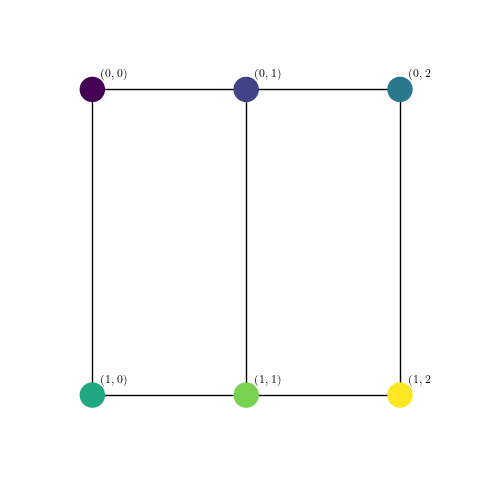

In [5]:
%matplotlib widget
mesh = Tensor((2,3))
fig = plt.figure()
draw2DMesh(fig.add_subplot(111), mesh )

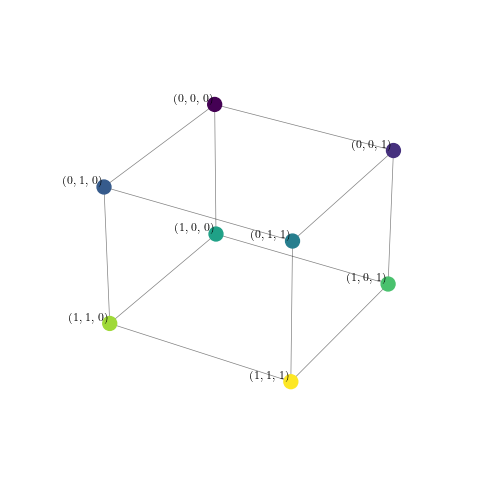

In [6]:
%matplotlib widget
fig = plt.figure()
mesh = Tensor((2,2,2))

draw3DMesh(fig.add_subplot(111, projection="3d"), mesh)

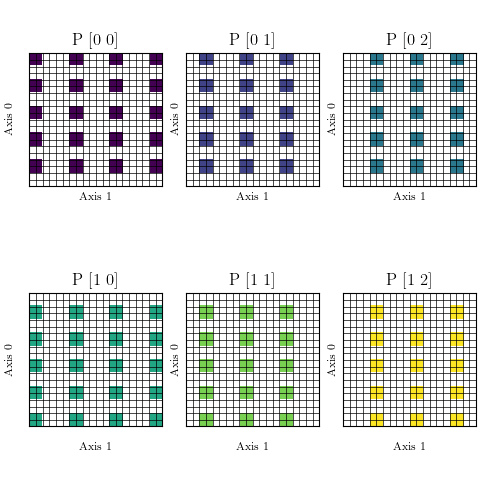

In [9]:
%matplotlib widget

tensor = Tensor((20, 20))
mesh = Tensor((2, 3))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))

processorArragement = d.processorArrangement
subplot_x = processorArragement[0]
subplot_y = (
    processorArragement[1] if len(d.processorArrangement) > 1 else 1
)

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

for p in range(d.numProcessors):

    p_midx = d.getProcessorMultiIndex(p)
    draw2DProcessorView(axs[p_midx[0], p_midx[1]], tensor, d, p)

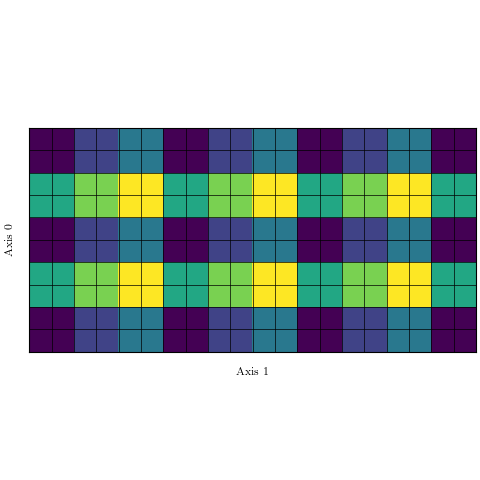

In [13]:
%matplotlib widget
fig = plt.figure(layout="constrained")
tensor = Tensor((10, 20))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
draw2DTensor(fig.add_subplot(111), tensor, d)

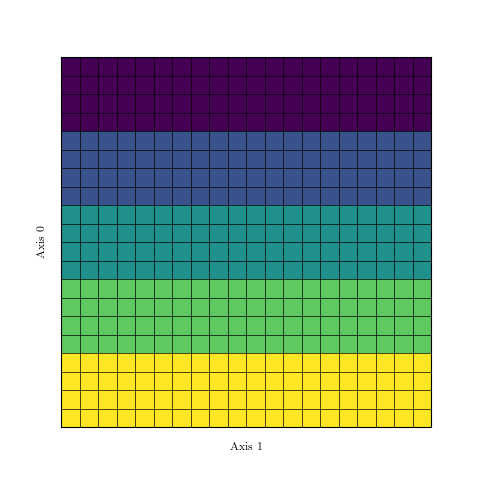

In [14]:
%matplotlib widget
fig = plt.figure()

tensor = Tensor((20, 20))
d = BlockDist(5, 0)
draw2DTensor(fig.add_subplot(111), tensor, d)

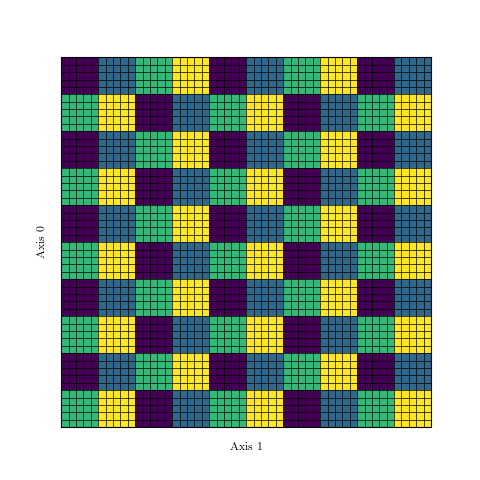

In [15]:
%matplotlib widget
fig = plt.figure()
tensor = Tensor((50, 50))
d = TileDist(4, 5)
draw2DTensor(fig.add_subplot(111), tensor, d)

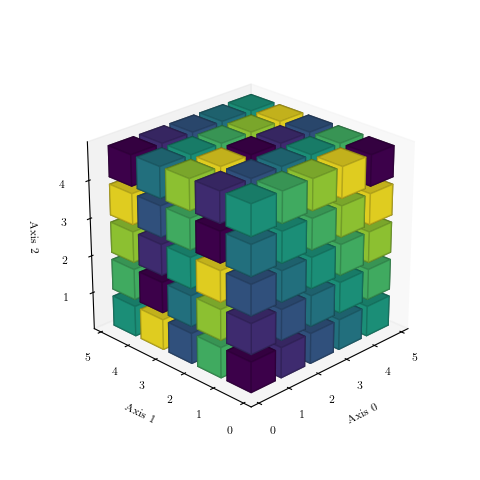

In [16]:
%matplotlib widget
fig = plt.figure()
tensor = Tensor((5, 5, 5))
dist = TileDist(8, 1)
# dist = BlockDist(5, 0)
draw3DTensor(fig.add_subplot(111, projection="3d"), tensor, dist)

In [ ]:
import networkx as nx
mesh = Tensor((4,3))
graph = nx.grid_2d_graph(*mesh.shape)
graph

In [ ]:
pos = nx.spring_layout(graph)
pos

{(0, 0): array([-0.16058205,  1.        ]),
 (0, 1): array([-0.54736434,  0.67395129]),
 (0, 2): array([-0.9152175 ,  0.32494214]),
 (1, 0): array([0.2005284, 0.5916879]),
 (1, 1): array([-0.1974292 ,  0.24406347]),
 (1, 2): array([-0.58914607, -0.11225231]),
 (2, 0): array([0.58759454, 0.11104805]),
 (2, 1): array([ 0.19935515, -0.24441353]),
 (2, 2): array([-0.2031681, -0.5894193]),
 (3, 0): array([ 0.91562531, -0.32588342]),
 (3, 1): array([ 0.55012361, -0.67532218]),
 (3, 2): array([ 0.15968026, -0.99840209])}